In [1]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

<h2> 1. Loading the dataframe</h2>
that was consolidated in a previous notebook 

In [2]:
transcript = pd.read_csv("C:/Users/david/Documents/0_kul/1_ma_stds_1/0_mda/project/data/1405transcript_preprocessed_compact.csv")
df = transcript
df.shape
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8102 entries, 0 to 8101
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        8094 non-null   object
 1   Session     8094 non-null   object
 2   Country     8094 non-null   object
 3   Transcript  8093 non-null   object
dtypes: object(4)
memory usage: 253.3+ KB
None


In [3]:
df['index'] = df.index
print(df.sample(5))

      Year Session Country                                         Transcript  \
4890  1997      52     COG  ﻿i wish congratulate president hisbrilliant el...   
4837  1997      52     MNG  ﻿it give mepleasure congratulate excellency mr...   
3196  1987      42     BEN  ﻿it give great pleasure true joy sir assume pr...   
3360  2001      56     NGA  ﻿recent event havemanifestly bring fore import...   
5323  1976      31     POL  mr president allow congratulate election high ...   

      index  
4890   4890  
4837   4837  
3196   3196  
3360   3360  
5323   5323  


<h2> 2. Extracting polarity level </h2>
We will extract the polarity level for each speech using Textblob

In [4]:
# creating empty lists
polarity = []
subjectivity = []
index = []

In [5]:
# calculating the polarity and subjectivity level of each transcript
for i in range(len(df)):
    blob_polarity = TextBlob(str(df.Transcript.values[i])).sentiment[0]
    blob_subjectivity = TextBlob(str(df.Transcript.values[i])).sentiment[1]
    polarity.append(blob_polarity)
    subjectivity.append(blob_subjectivity)
    index.append(i)

In [6]:
mydict = {
    'polarity' : polarity,
    'subjectivity' : subjectivity,
    'index' : index
}

In [7]:
scores_textblob = pd.DataFrame(mydict)
df_sentiment = df.merge(scores_textblob,on='index')
print(df_sentiment.sample(3))

      Year Session Country                                         Transcript  \
7106  1988      43     DOM  ﻿on behalf government dominican republic alleg...   
6553  2012      67     ROU  ﻿thecurrent session give u acomplete picture t...   
6083  1975      30     BWA  delegation take place rostrum rather late day ...   

      index  polarity  subjectivity  
7106   7106  0.120945      0.422492  
6553   6553  0.098008      0.405647  
6083   6083  0.060235      0.331232  


<h2> 3. Extracting polarity level </h2>
We will extract the polarity level for each speech using Vader lexicon

In [8]:
# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()

In [9]:
list_score = []
list_index = []
for i in range(0,len(df)):
    score = vader.polarity_scores(str(df.Transcript[i]))
    index = i
    list_score.append(score)
    list_index.append(index)

In [10]:
# Convert the list of dicts into a DataFrame
scores_vader = pd.DataFrame(list_score)
scores_vader['index'] = list_index

In [11]:
scores_vader.sample(3)

,neg,neu,pos,compound,index
3410,0.090,0.643,0.267,0.9998,3410
5397,0.147,0.622,0.230,0.9993,5397
3805,0.162,0.627,0.211,0.9955,3805


<h2> 4. Merge all together and save the document as CSV </h2>

In [12]:
# Join the DataFrames
sentiment_df = df_sentiment.merge(scores_vader,on='index')

In [13]:
sentiment_df.shape

(8102, 11)

In [14]:
sentiment_df.sample(7)

,Year,Session,Country,Transcript,index,polarity,subjectivity,neg,neu,pos,compound
2377,1993,48,CRI,four year since end thecold war fall old ideol...,2377,0.075891,0.421442,0.122,0.639,0.239,0.9997
6125,1975,30,HND,begin thirtieth session like convey president ...,6125,0.141787,0.466013,0.109,0.601,0.290,0.9998
1135,2015,70,SVN,historic junction turn next month occasion opp...,1135,0.135677,0.457980,0.101,0.574,0.325,0.9996
6969,1991,46,TUN,﻿it give pleasure express behalf country behal...,6969,0.117417,0.459235,0.091,0.577,0.332,1.0000
4144,2017,72,TTO,community gather together reaffirm possibility...,4144,0.121454,0.452211,0.086,0.667,0.247,0.9996
397,1995,50,DNK,sad irony whilewe celebrate fiftieth anniversa...,397,0.089105,0.376644,0.105,0.672,0.223,0.9989
3858,2002,57,IRN,﻿iwould like outset congratulate mr jan kavano...,3858,0.103958,0.447514,0.187,0.625,0.189,-0.9672


In [15]:
sentiment_df.to_csv('sentiment_df.csv',index=False)

<h2> 4. Plot sentiment </h2>

Vader sentiment

In [16]:
y = sentiment_df.groupby("Year")["pos"].mean()
x = y.index

In [17]:
len(x)

50

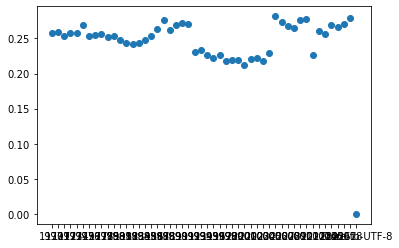

In [18]:
plt.scatter(x,y)
plt.show()

Textblob sentiment

In [19]:
y_polarity = sentiment_df.groupby('Year')['polarity'].mean()

In [20]:
x_polarity = y_polarity.index

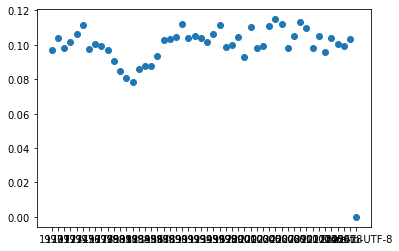

In [21]:
plt.scatter(x_polarity,y_polarity)
plt.show()

<h2> 5. polarity mean by country </h2>

In [22]:
mean_country = sentiment_df.groupby("Country").mean()

In [23]:
sorted_mean_country = mean_country.sort_values(by=['pos'],ascending=True)

In [24]:
print(sorted_mean_country.head(10))

               index  polarity  subjectivity       neg       neu       pos  \
Country                                                                      
.DS      7859.000000  0.000000      0.000000  0.000000  1.000000  0.000000   
CUB      4046.265306  0.052403      0.425829  0.177224  0.630510  0.192184   
ATG      4177.342857  0.071141      0.435727  0.144343  0.652686  0.202943   
LCA      4005.257143  0.085255      0.433852  0.123943  0.666429  0.209686   
LBY      4012.510638  0.082890      0.413252  0.164319  0.620277  0.215383   
SGP      4107.854167  0.079313      0.453058  0.139375  0.644875  0.215604   
DMA      4128.531250  0.094932      0.435216  0.124937  0.656313  0.218875   
RUS      4026.000000  0.076331      0.442617  0.138396  0.641646  0.220000   
SYR      4030.938776  0.071830      0.434242  0.172939  0.606367  0.220673   
IRQ      4044.510204  0.086674      0.421188  0.148776  0.630449  0.220714   

         compound  
Country            
.DS      0.000000  
CUB

In [25]:
sorted_mean_country = mean_country.sort_values(by=['polarity'],ascending=True)

In [26]:
print(sorted_mean_country.head(10))

               index  polarity  subjectivity       neg       neu       pos  \
Country                                                                      
.DS      7859.000000  0.000000      0.000000  0.000000  1.000000  0.000000   
CUB      4046.265306  0.052403      0.425829  0.177224  0.630510  0.192184   
ERI      3944.730769  0.059796      0.442767  0.146808  0.617692  0.235654   
IRN      4044.551020  0.066717      0.428916  0.166265  0.600000  0.233612   
ATG      4177.342857  0.071141      0.435727  0.144343  0.652686  0.202943   
EU       3808.625000  0.071226      0.411437  0.164625  0.576375  0.259000   
SYR      4030.938776  0.071830      0.434242  0.172939  0.606367  0.220673   
ISR      4046.306122  0.073455      0.431697  0.167102  0.606551  0.226408   
RUS      4026.000000  0.076331      0.442617  0.138396  0.641646  0.220000   
BIH      4086.222222  0.077912      0.443135  0.143296  0.613593  0.243296   

         compound  
Country            
.DS      0.000000  
CUB